<a href="https://colab.research.google.com/github/TitasDas/dozee_assignments/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-2: Outlier removal

Outlier detection from a trend is a common data analysis technique used to identify data points that deviate significantly from the long-term or short-term trend or pattern in a dataset. An outlier is an observation that is notably different from other/nearby observations, and it can indicate errors, anomalies, or important insights in the data.

### Problem Statement: Write a function which removes outleir points in a 1D trend data provided

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(4)

In [5]:
def generate_trend_with_outliers():
    segment_nos = np.random.randint(25,50)
    slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

    points=[]
    constant = (np.random.random()-0.5)*100
    for i in range(segment_nos):
        points += [constant+(slopes[i]*j)+ 30*(np.random.random()-0.5)*(1+5*(np.random.random()>0.8)) for j in range(1,np.random.randint(20,41))]
        constant = points[-1]
    return np.array(points)

#### An example trend with outliers

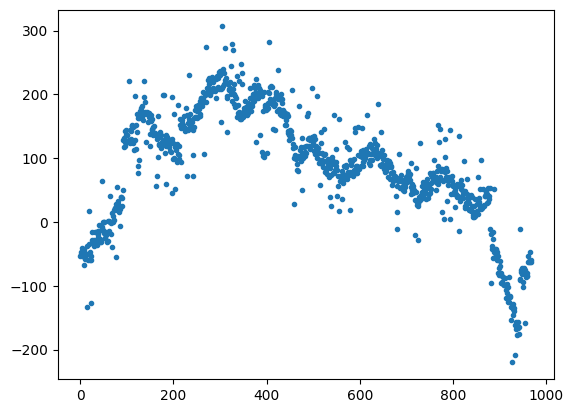

In [ ]:
plt.plot(generate_trend_with_outliers(),".")

# Solution Strategy :

The solution has been broken down into the following two steps.

- Try two popular methods of outlier detection : The methods chosen are **Isolation forest (method 1)** and **one class SVMs (method 2)**. Interpret results through visual inspection.

- Now, as a next step instead of only relying on visual inspection to interpret the results, lets come up with a formalized metric. The metric used here is similar to that of a classification problem - precision, recall and F1 score.

## Part 1 - The two methods are implemented and the performance is only evaluated through visual inspection.


### Method 1 : Using Isolation Forest

- the contamination parameter can be manipulated and optimized however going with "auto" for now

In [2]:
from sklearn.ensemble import IsolationForest

In [9]:
def remove_outliers(array_with_outliers):
    # Write your code here
    # There is no quantitive validation for this question
    # Your solution will be qualitatively validated by comparing plots with/without outliers

    array_with_outliers = array_with_outliers.reshape(-1, 1)
    clf = IsolationForest(contamination='auto', random_state=42)
    clf.fit(array_with_outliers)
    pred = clf.predict(array_with_outliers)
    array_without_outliers = array_with_outliers[pred == 1]
    array_without_outliers = array_without_outliers.reshape(-1)

    return array_without_outliers

In [10]:
# Generate trend with outliers
array_with_outliers = generate_trend_with_outliers()

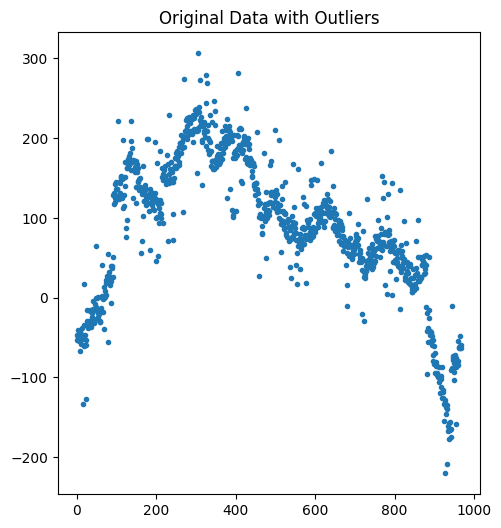

In [11]:
# Plot original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Data with Outliers")
plt.plot(array_with_outliers, ".")

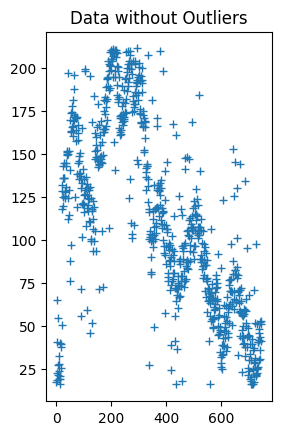

In [12]:
# Remove outliers and plot
plt.subplot(1, 2, 2)
plt.title("Data without Outliers")
plt.plot(remove_outliers(array_with_outliers), "+")
plt.show()

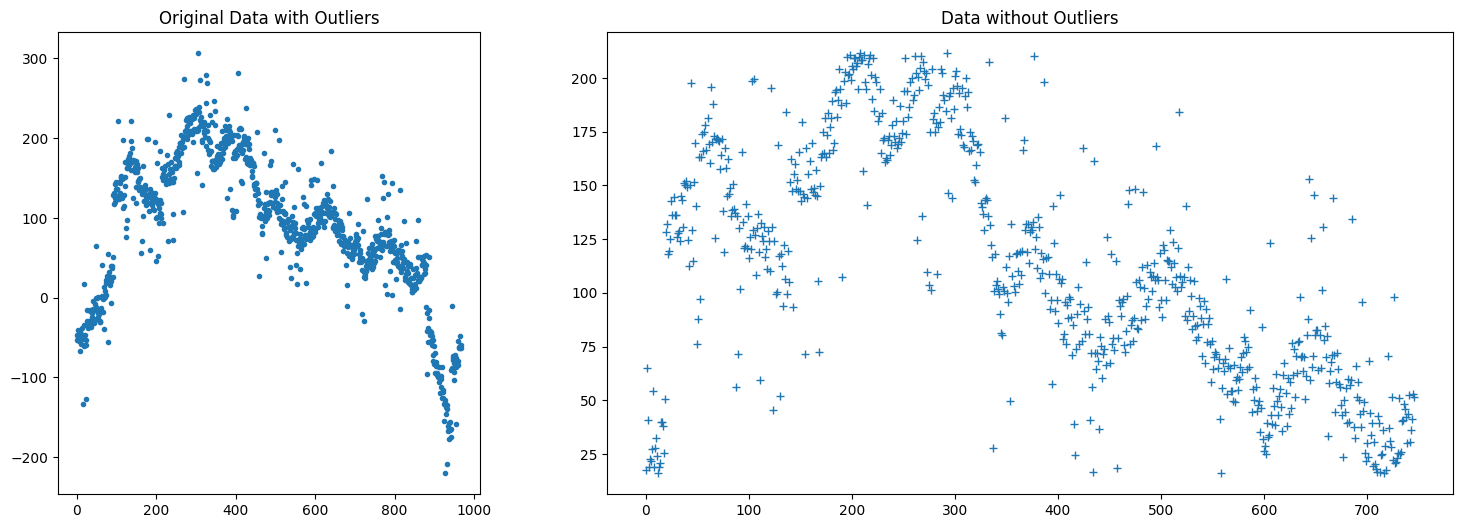

In [13]:
# Create subplots with different sizes
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2]})

# Plot original data
axs[0].set_title("Original Data with Outliers")
axs[0].plot(array_with_outliers, ".")

# Remove outliers and plot
axs[1].set_title("Data without Outliers")
axs[1].plot(remove_outliers(array_with_outliers), "+")

plt.show()

### Method 2 : Using one class SVMs

- Here I have used a RBF kernel. The nu parameter is an upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors.

In [14]:
from sklearn.svm import OneClassSVM

def remove_outliers(array_with_outliers):
    array_with_outliers = array_with_outliers.reshape(-1, 1)
    clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
    clf.fit(array_with_outliers)
    pred = clf.predict(array_with_outliers)
    array_without_outliers = array_with_outliers[pred == 1]
    array_without_outliers = array_without_outliers.reshape(-1)
    return array_without_outliers

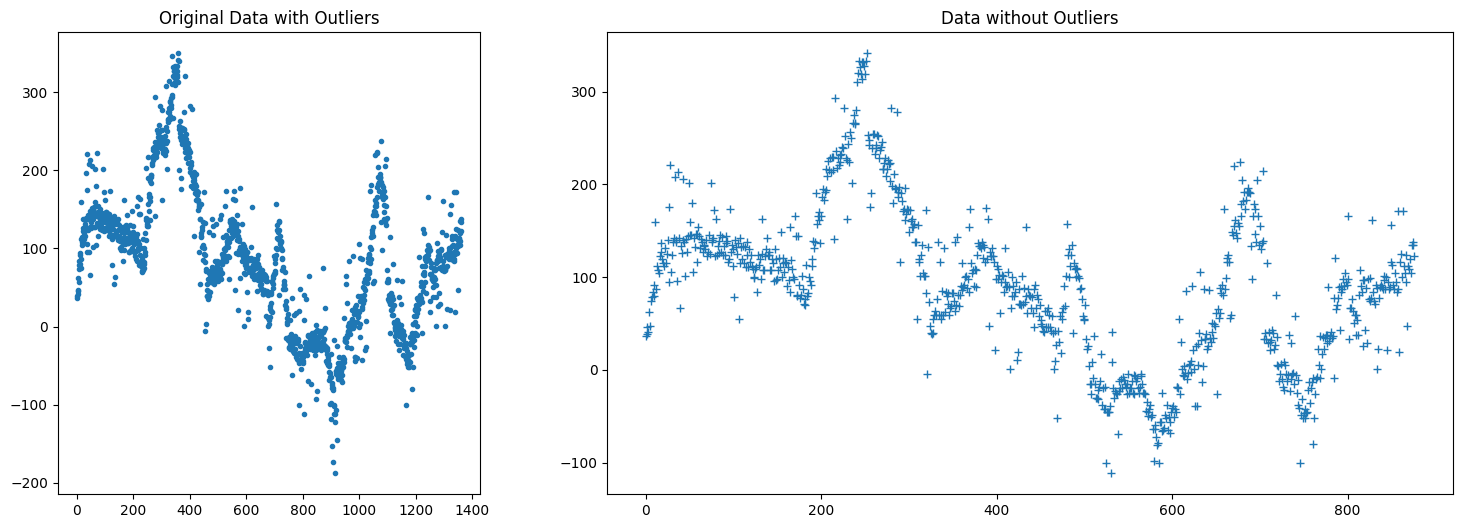

In [16]:
# Generate trend with outliers
array_with_outliers = generate_trend_with_outliers()

# Create subplots with different sizes
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2]})

# Plot original data
axs[0].set_title("Original Data with Outliers")
axs[0].plot(array_with_outliers, ".")

# Remove outliers and plot
axs[1].set_title("Data without Outliers")
axs[1].plot(remove_outliers(array_with_outliers), "+")

plt.show()

# Part 2: The same two methods are implemented but a more formalized performance metric is used.

## Method 1: Using a formalized metric to compare isolation forest and SVMs

- Generate the main trend without outliers. Intentionally introduce some outliers. Label the data points: 1 for outliers and 0 for inliers.
- Apply both the Isolation Forest and One-Class SVM methods to detect outliers, and then calculate precision, recall, and F1-score for both methods.
- In the plot : RED = outliers and BLUE = inliers
&
Labels 0 = inlier
Labels 1 = Outlier

In [18]:
def generate_synthetic_data_with_labels():
    segment_nos = np.random.randint(25,50)
    slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

    points = []
    labels = []  # 0 for inliers, 1 for outliers
    constant = (np.random.random()-0.5)*100
    for i in range(segment_nos):
        for j in range(1, np.random.randint(20,41)):
            point = constant + (slopes[i] * j)
            if np.random.random() > 0.9:  # Introduce outliers with 10% probability
                point += 100 * (np.random.random() - 0.5)  # Add a large random noise to create an outlier
                labels.append(1)
            else:
                labels.append(0)
            points.append(point)
        constant = points[-1]
    return np.array(points), np.array(labels)


In [19]:
# Function to remove outliers using Isolation Forest
def remove_outliers_iforest(array):
    array = array.reshape(-1, 1)
    clf = IsolationForest(contamination='auto', random_state=42)
    clf.fit(array)
    pred = clf.predict(array)
    return (pred == 1).astype(int)  # Convert to 0 for inliers and 1 for outliers

# Function to remove outliers using One-Class SVM
def remove_outliers_svm(array):
    array = array.reshape(-1, 1)
    clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
    clf.fit(array)
    pred = clf.predict(array)
    return (pred == 1).astype(int)  # Convert to 0 for inliers and 1 for outliers

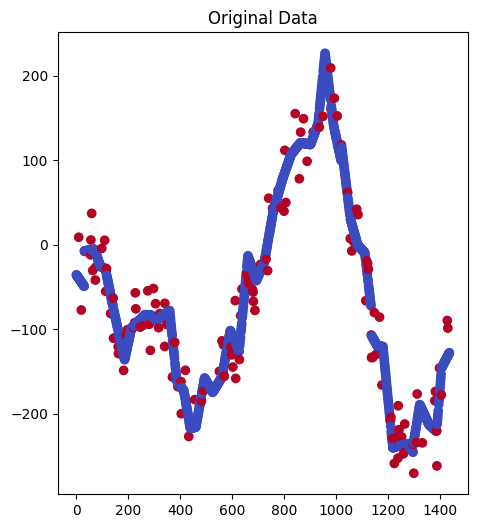

In [21]:
# Generate synthetic data and true outlier labels
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

# Plot original data
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Original Data")
plt.scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')

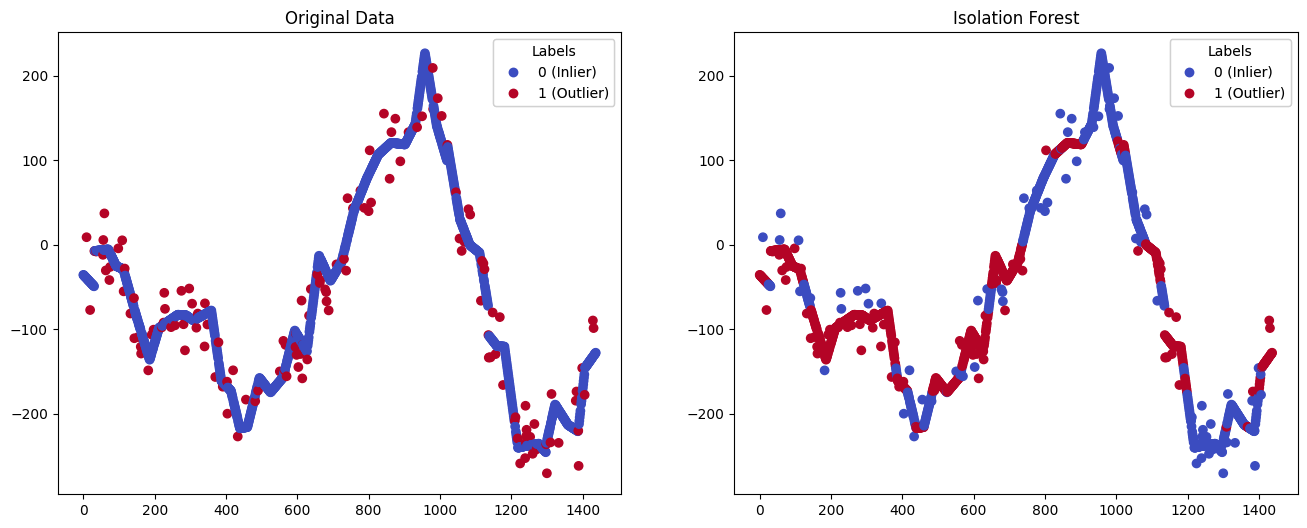

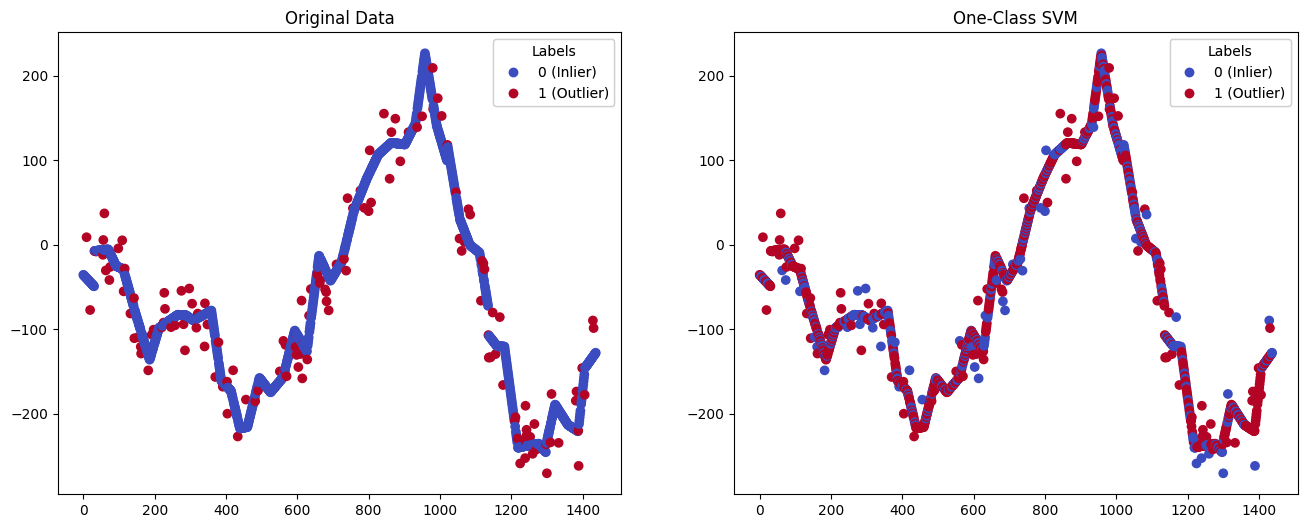

In [25]:
# Create first set of subplots for Original and Isolation Forest
fig1, axs1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data
axs1[0].set_title("Original Data")
scatter1 = axs1[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
legend1 = axs1[0].legend(handles=scatter1.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs1[0].add_artist(legend1)

# Apply Isolation Forest method and plot
predicted_outliers_iforest = remove_outliers_iforest(array_with_outliers)
axs1[1].set_title("Isolation Forest")
scatter2 = axs1[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=predicted_outliers_iforest, cmap='coolwarm')
legend2 = axs1[1].legend(handles=scatter2.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs1[1].add_artist(legend2)

plt.show()

# Create second set of subplots for Original and One-Class SVM
fig2, axs2 = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data
axs2[0].set_title("Original Data")
scatter3 = axs2[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
legend3 = axs2[0].legend(handles=scatter3.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs2[0].add_artist(legend3)

# Apply One-Class SVM method and plot
predicted_outliers_svm = remove_outliers_svm(array_with_outliers)
axs2[1].set_title("One-Class SVM")
scatter4 = axs2[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=predicted_outliers_svm, cmap='coolwarm')
legend4 = axs2[1].legend(handles=scatter4.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs2[1].add_artist(legend4)

plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate metrics for Isolation Forest
precision_iforest = precision_score(true_outliers, predicted_outliers_iforest)
recall_iforest = recall_score(true_outliers, predicted_outliers_iforest)
f1_iforest = f1_score(true_outliers, predicted_outliers_iforest)

print("Isolation Forest Metrics:")
print(f"Precision: {precision_iforest}")
print(f"Recall: {recall_iforest}")
print(f"F1 Score: {f1_iforest}")

# Calculate metrics for One-Class SVM
precision_svm = precision_score(true_outliers, predicted_outliers_svm)
recall_svm = recall_score(true_outliers, predicted_outliers_svm)
f1_svm = f1_score(true_outliers, predicted_outliers_svm)

print("\nOne-Class SVM Metrics:")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

Isolation Forest Metrics:
Precision: 0.07584597432905485
Recall: 0.4642857142857143
F1 Score: 0.1303911735205617

One-Class SVM Metrics:
Precision: 0.1006637168141593
Recall: 0.65
F1 Score: 0.1743295019157088


## Method 2 : A shot at improving the F1 scores

- Try a LOF - Local Outlier Factor , typically used when datasets have a non uniform density distribution
- Try a combination of ensemble methods - for example combining isolation forest and autoencoders. Here also a demonstration has been done to show how varying the hidden layers and architecture of the autoencoder can yield slightly different results.